In [1]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime

In [2]:
df_tesla=pdr.get_data_yahoo('TSLA')
df_tesla

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-03-13,49.369999,48.556000,48.964001,49.234001,15113000.0,49.234001
2017-03-14,51.624001,49.203999,49.222000,51.599998,37992000.0,51.599998
2017-03-15,52.200001,50.854000,51.400002,51.146000,26654000.0,51.146000
2017-03-16,53.150002,51.812000,52.480000,52.410000,35661000.0,52.410000
2017-03-17,53.066002,52.240002,52.799999,52.299999,32487500.0,52.299999
...,...,...,...,...,...,...
2022-03-08,849.989990,782.169983,795.530029,824.400024,26799700.0,824.400024
2022-03-09,860.559998,832.010010,839.479980,858.969971,19728000.0,858.969971
2022-03-10,854.450012,810.359985,851.450012,838.299988,19549500.0,838.299988


In [3]:
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-03-13,49.369999,48.556000,48.964001,49.234001,15113000.0,49.234001
2017-03-14,51.624001,49.203999,49.222000,51.599998,37992000.0,51.599998
2017-03-15,52.200001,50.854000,51.400002,51.146000,26654000.0,51.146000
2017-03-16,53.150002,51.812000,52.480000,52.410000,35661000.0,52.410000
2017-03-17,53.066002,52.240002,52.799999,52.299999,32487500.0,52.299999


In [4]:
##simple moving average

<AxesSubplot:xlabel='Date'>

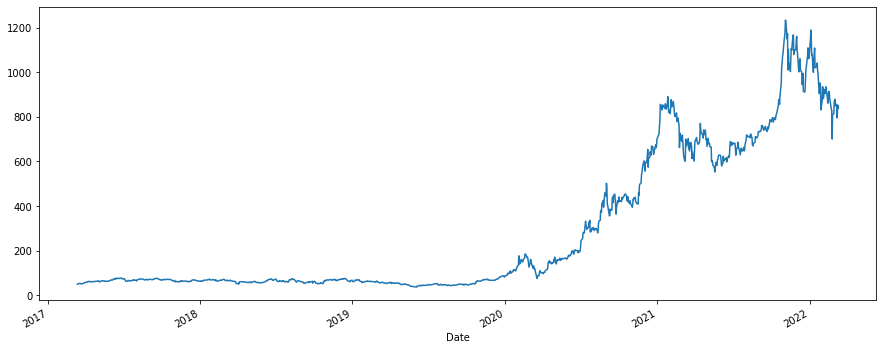

In [6]:
df_tesla['Open'].plot(figsize=(15,6))

In [7]:
df_tesla['Open:10 days rolling']=df_tesla['Open'].rolling(window=10,min_periods=1).mean()

<AxesSubplot:xlabel='Date'>

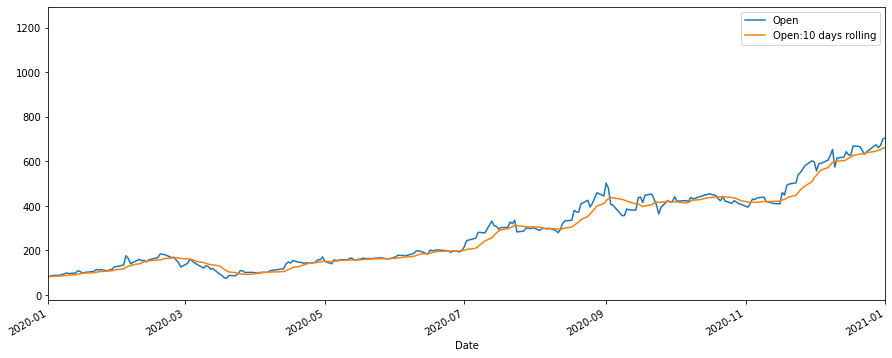

In [12]:
df_tesla[['Open','Open:10 days rolling']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))

In [13]:
df_tesla['Open:20 days rolling']=df_tesla['Open'].rolling(window=20,min_periods=1).mean()
df_tesla['Open:30 days rolling']=df_tesla['Open'].rolling(window=30,min_periods=1).mean()
df_tesla['Open:50 days rolling']=df_tesla['Open'].rolling(window=50,min_periods=1).mean()

<AxesSubplot:xlabel='Date'>

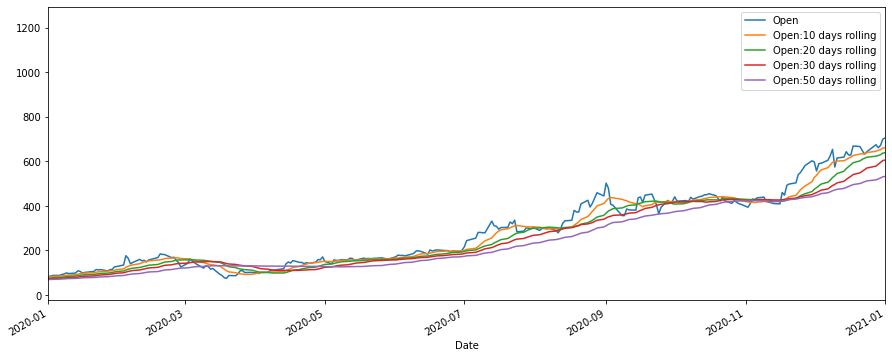

In [14]:
df_tesla[['Open','Open:10 days rolling','Open:20 days rolling','Open:30 days rolling','Open:50 days rolling']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))

In [15]:
##Expanding(Cumulative Moving Average)

<AxesSubplot:xlabel='Date'>

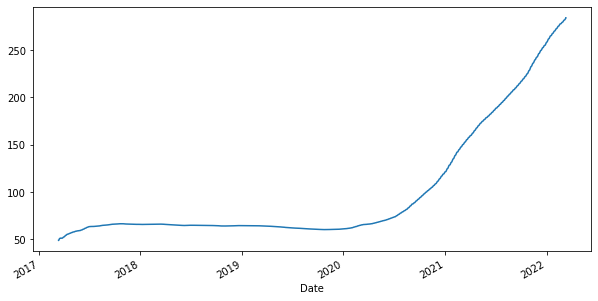

In [18]:
df_tesla['Open'].expanding().mean().plot(figsize=(10,5))

In [19]:
#EMA - Exponential moving average

In [20]:
#EMA tesla shares
# Let's smoothing factor - 0.1
#Formula- ((close-prev EMA)*Multiplier)+prev EMA
df_tesla['EMA_0.1']=df_tesla['Open'].ewm(alpha=0.1,adjust=False).mean()

<AxesSubplot:xlabel='Date'>

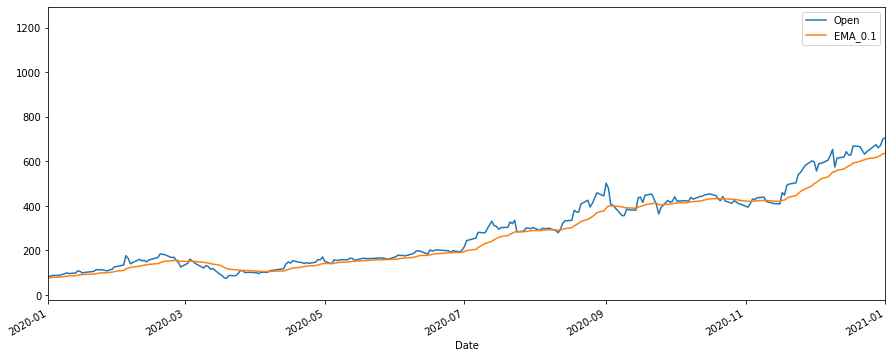

In [22]:
df_tesla[['Open','EMA_0.1']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))

In [24]:
#EWMA tesla shares
#Formula- EWMA(t)=alpha*x(t) + (1-alpha)*EWMA(t-1)
df_tesla['EMWA3']=df_tesla['Open'].ewm(span=3,adjust=False).mean()

<AxesSubplot:xlabel='Date'>

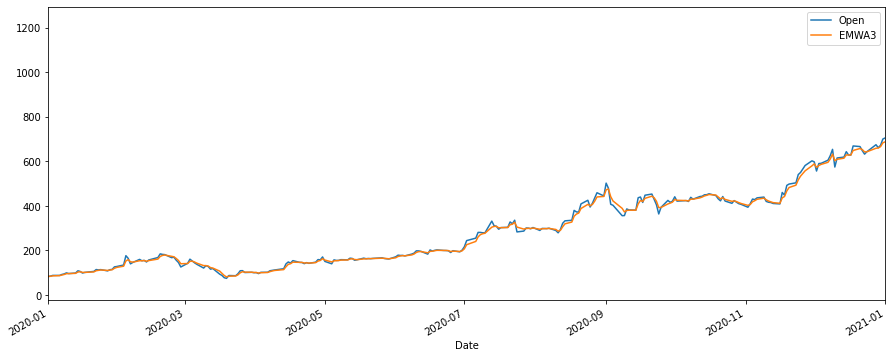

In [25]:
df_tesla[['Open','EMWA3']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))